In [7]:
from pprint import pprint
import json, re
with open("../../Jeffs_data/BIOLOG/BIOLOG_trial_conditions.json", 'r') as trials:
    biolog_trials = json.load(trials)
    
# for trial, name in biolog_trials.items():
#     content = {"name": name, "ModelSEED_ID": "", "mM": 0}
#     biolog_trials[trial] = content
    
# with open("../../Jeffs_data/BIOLOG/BIOLOG_trial_conditions.json", 'w') as trials:
#     json.dump(biolog_trials, trials, indent=3)

undefinedNames = {"unmatched":[], "mismatched":[]}
for trial, content in biolog_trials.items():
    if not content["ModelSEED_ID"]:
        undefinedNames["unmatched"].append(content["name"])
    elif "notes" in content:
        best_match = content["notes"] if not re.search(r"(?<=with )(.+)(?=,)", content["notes"]) else re.search(r"(?<=with )(.+)(?=,)", content["notes"]).group()
        undefinedNames["mismatched"].append({"original":content["name"], "bestMatch": best_match})
        
with open("../../Jeffs_data/BIOLOG/BIOLOG_condition_matching.json", 'w') as trials:
    json.dump(undefinedNames, trials, indent=3)
pprint(undefinedNames)

{'mismatched': [{'bestMatch': 'Trehalose 6-phosphate',
                 'original': 'D-Trehalose'},
                {'bestMatch': 'alpha-Cellobiose', 'original': 'D-Cellobiose'},
                {'bestMatch': 'Jeff confirmed that the positive control is '
                              'merely Glucose.',
                 'original': 'Positive Control'},
                {'bestMatch': 'D-Raffinose pentahydrate',
                 'original': 'D-Raffinose'},
                {'bestMatch': 'beta-Lactose', 'original': 'alpha-D-Lactose'},
                {'bestMatch': 'beta-D-Glucoside',
                 'original': 'beta-Methyl-D-Glucoside'},
                {'bestMatch': 'Salicin', 'original': 'D-Salicin'},
                {'bestMatch': 'UDP-N-acetyl-D-galactosamine',
                 'original': 'N-Acetyl-D-Galactosamine'},
                {'bestMatch': 'Neuraminic acid',
                 'original': 'N-Acetyl-Neuraminic Acid'},
                {'bestMatch': 'beta-D-Glucose', 'original': 'al

In [2]:
# def _find_culture(string):
#     matches = re.findall(r"([A-Z]{2}\+?[A-Z]*)", string)
#     print(matches)
#     return [m for m in matches if not any([x in m for x in ["BIOLOG", "III"]])]

# print(_find_culture("../../Jeffs_data/BIOLOG/PF genIII plate 9-12-22.xlsx"))

In [3]:
# # define the environment path 
# import os
# # local_cobrakbase_path = os.path.join('/Users/afreiburger/Documents')
# local_cobrakbase_path = os.path.join('C:', 'Users', 'Andrew Freiburger','Documents','Argonne','cobrakbase')
# os.environ["HOME"] = local_cobrakbase_path

# # import the models
# import cobrakbase
# # with open("/Users/afreiburger/Documents/kbase_token.txt") as token_file:
# with open("C:/Users/Andrew Freiburger/Documents/Argonne/kbase_token.txt") as token_file:
#     kbase_api = cobrakbase.KBaseAPI(token_file.readline())
    
# import warnings
# warnings.filterwarnings(action='once')

# from pandas import set_option
# set_option("display.max_rows", None)

In [4]:
from cobra.io import load_json_model
pf = load_json_model("../../../pf.json")

%run ../datastandardization.py
data_paths={"path": "../../Jeffs_data/BIOLOG/PF genIII plate 9-12-22.xlsx", "Fluorescence":"pf", "Raw OD(600)": "OD"}
experimental_metadata, biolog_df, fluxes_df, standardized_carbon_conc, trial_name_conversion, data_timestep_hr, simulation_timestep = BiologData.process(
    data_paths, 
    "../../Jeffs_data/BIOLOG/BIOLOG_trial_conditions.json", 
    community_members = {
        pf: {
            'name': 'pf',
            'phenotypes': {
                'acetate': {"consumed":["cpd00029"]}, # kbase_api.get_from_ws("93465/25/1"), #'93465/11/1'), 
                '4HB': {"consumed":["cpd00136"]} # kbase_api.get_from_ws('	93465/27/1')} #93465/15/1')}
                }
        }
    },
    culture="P. fluorescens")

-3.063614460242093
The model GCF_001612705.1.RAST.mdl is unable to be simulated with pFBA and yields a < None (infeasible). > error.
-1.3478300695171295


In [5]:
from pandas import set_option
set_option("display.max_rows", None)
set_option("display.max_rows", 500)
display(biolog_df)

,trial_IDs,Time (s),pf:Fluorescence,OD:Raw_OD(600)
short_codes,,,,
B1,,21.328953,123309.0,0.149
B1,,622.366807,134573.0,0.156
B1,,1204.739427,139851.0,0.164
B1,,1797.142547,151872.0,0.171
B1,,2389.594406,158283.0,0.178
...,...,...,...,...
B96,,163538.916047,1089049.0,0.823
B96,,164131.435990,1138113.0,1.024
B96,,164723.973083,1043167.0,0.795


In [6]:
set_option("display.max_rows", None)
display(fluxes_df)
display(experimental_metadata)

,pf_acetate,pf_4HB,pf_stationary
rxn,,,
EX_cpd00001_e0,4.533296e+00,2.449417e+00,0
EX_cpd00007_e0,-2.025521e+00,-5.333032e+00,0
EX_cpd00009_e0,-7.625410e-02,-7.625410e-02,0
EX_cpd00011_e0,2.377641e+00,5.685222e+00,0
EX_cpd00012_e0,0.000000e+00,-8.351191e-15,0
EX_cpd00013_e0,-8.611666e-01,-8.611666e-01,0
EX_cpd00029_e0,-3.063614e+00,0.000000e+00,0
EX_cpd00030_e0,-2.806159e-04,-2.806159e-04,0
EX_cpd00034_e0,-2.806159e-04,-2.806159e-04,0


,condition,ModelSEED_ID,strain,date
short_code,,,,
B1,Negative Control,,P. fluorescens,"Sep 12, 22"
B2,Dextrin,cpd11594,P. fluorescens,"Sep 12, 22"
B3,D-Maltose,cpd00179,P. fluorescens,"Sep 12, 22"
B4,D-Trehalose,cpd00523,P. fluorescens,"Sep 12, 22"
B5,D-Cellobiose,cpd03844,P. fluorescens,"Sep 12, 22"
B6,Gentiobiose,cpd05158,P. fluorescens,"Sep 12, 22"
B7,Sucrose,cpd00076,P. fluorescens,"Sep 12, 22"
B8,D-Turanose,cpd20885,P. fluorescens,"Sep 12, 22"
B9,Stachyose,cpd01133,P. fluorescens,"Sep 12, 22"


# Test the generalized data in CommFitting

,condition,ModelSEED_ID,strain,date
short_code,,,,
B1,Negative Control,,P. fluorescens,"Sep 12, 22"
B2,Dextrin,cpd11594,P. fluorescens,"Sep 12, 22"
B3,D-Maltose,cpd00179,P. fluorescens,"Sep 12, 22"
B4,D-Trehalose,cpd00523,P. fluorescens,"Sep 12, 22"
B5,D-Cellobiose,cpd03844,P. fluorescens,"Sep 12, 22"
B6,Gentiobiose,cpd05158,P. fluorescens,"Sep 12, 22"
B7,Sucrose,cpd00076,P. fluorescens,"Sep 12, 22"
B8,D-Turanose,cpd20885,P. fluorescens,"Sep 12, 22"
B9,Stachyose,cpd01133,P. fluorescens,"Sep 12, 22"


B1


condition       Negative Control
ModelSEED_ID                    
strain            P. fluorescens
date                  Sep 12, 22
Name: B1, dtype: object

Done with concentrations and biomass loops: 0.0015625 min
Done with DCC loop: 0.00026041666666666666 min
Done with the dbc & diffc loop: 0.00234375 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.08177083333333333 min
Done exporting the content: 0.014322916666666666 min
The simulation lacks any flux.




B2


condition              Dextrin
ModelSEED_ID          cpd11594
strain          P. fluorescens
date                Sep 12, 22
Name: B2, dtype: object

Done with concentrations and biomass loops: 0.0013020833333333333 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.00234375 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.07421875 min
Done exporting the content: 0.009635416666666667 min
The simulation lacks any flux.




B3


condition            D-Maltose
ModelSEED_ID          cpd00179
strain          P. fluorescens
date                Sep 12, 22
Name: B3, dtype: object

Done with concentrations and biomass loops: 0.0015625 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.00234375 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.07083333333333333 min
Done exporting the content: 0.009895833333333333 min
The simulation lacks any flux.




B4


condition          D-Trehalose
ModelSEED_ID          cpd00523
strain          P. fluorescens
date                Sep 12, 22
Name: B4, dtype: object

Done with concentrations and biomass loops: 0.0015625 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.0026041666666666665 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.07239583333333334 min
Done exporting the content: 0.009375 min
The simulation lacks any flux.




B5


condition         D-Cellobiose
ModelSEED_ID          cpd03844
strain          P. fluorescens
date                Sep 12, 22
Name: B5, dtype: object

Done with concentrations and biomass loops: 0.0013020833333333333 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.0067708333333333336 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.06692708333333333 min
Done exporting the content: 0.013802083333333333 min
The simulation lacks any flux.




B6


condition          Gentiobiose
ModelSEED_ID          cpd05158
strain          P. fluorescens
date                Sep 12, 22
Name: B6, dtype: object

Done with concentrations and biomass loops: 0.0013020833333333333 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.0026041666666666665 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.07057291666666667 min
Done exporting the content: 0.009375 min
The simulation lacks any flux.




B7


condition              Sucrose
ModelSEED_ID          cpd00076
strain          P. fluorescens
date                Sep 12, 22
Name: B7, dtype: object

Done with concentrations and biomass loops: 0.0013020833333333333 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.0026041666666666665 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.07161458333333333 min
Done exporting the content: 0.013802083333333333 min
The simulation lacks any flux.




B8


condition           D-Turanose
ModelSEED_ID          cpd20885
strain          P. fluorescens
date                Sep 12, 22
Name: B8, dtype: object

Done with concentrations and biomass loops: 0.0015625 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.00234375 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.07135416666666666 min
Done exporting the content: 0.009635416666666667 min
The simulation lacks any flux.




B9


condition            Stachyose
ModelSEED_ID          cpd01133
strain          P. fluorescens
date                Sep 12, 22
Name: B9, dtype: object

Done with concentrations and biomass loops: 0.0010416666666666667 min
Done with DCC loop: 0.00026041666666666666 min
Done with the dbc & diffc loop: 0.0026041666666666665 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.07213541666666666 min
Done exporting the content: 0.009375 min
The simulation lacks any flux.




B10


condition       Positive Control
ModelSEED_ID            cpd00027
strain            P. fluorescens
date                  Sep 12, 22
Name: B10, dtype: object

Done with concentrations and biomass loops: 0.00546875 min
Done with DCC loop: 0.00026041666666666666 min
Done with the dbc & diffc loop: 0.0026041666666666665 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.07291666666666667 min
Done exporting the content: 0.009635416666666667 min
The simulation lacks any flux.




B11


condition                 pH 6
ModelSEED_ID          cpd00067
strain          P. fluorescens
date                Sep 12, 22
Name: B11, dtype: object

Done with concentrations and biomass loops: 0.0013020833333333333 min
Done with DCC loop: 0.00026041666666666666 min
Done with the dbc & diffc loop: 0.003125 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.07994791666666666 min
Done exporting the content: 0.010677083333333334 min
The simulation lacks any flux.




B12


condition                 pH 5
ModelSEED_ID          cpd00067
strain          P. fluorescens
date                Sep 12, 22
Name: B12, dtype: object

Done with concentrations and biomass loops: 0.00625 min
Done with DCC loop: 0.00026041666666666666 min
Done with the dbc & diffc loop: 0.003125 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.078125 min
Done exporting the content: 0.0109375 min
graph_0
{'content': 'biomass',
 'experimental_data': False,
 'phenotype': set(),
 'species': ['Raw_OD(600)'],
 'trial': 'G48'}
graph_1
{'content': 'conc',
 'experimental_data': False,
 'mets': ['cpd00067'],
 'trial': 'G48'}
graph_2
{'content': 'biomass',
 'experimental_data': False,
 'phenotype': set(),
 'species': ['ecoli'],
 'trial': 'G48'}
graph_3
{'content': 'total_biomass',
 'experimental_data': True,
 'species': ['Raw_OD(600)'],
 'trial': 'G48'}




B13


condition          D-Raffinose
ModelSEED_ID          cpd30716
strain          P. fluorescens
date                Sep 12, 22
Name: B13, dtype: object

Done with concentrations and biomass loops: 0.0013020833333333333 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.0026041666666666665 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.07916666666666666 min
Done exporting the content: 0.009895833333333333 min
The simulation lacks any flux.




B14


condition       alpha-D-Lactose
ModelSEED_ID           cpd01354
strain           P. fluorescens
date                 Sep 12, 22
Name: B14, dtype: object

Done with concentrations and biomass loops: 0.0013020833333333333 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.0026041666666666665 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.06692708333333333 min
Done exporting the content: 0.009375 min
The simulation lacks any flux.




B15


condition          D-Melibiose
ModelSEED_ID          cpd03198
strain          P. fluorescens
date                Sep 12, 22
Name: B15, dtype: object

Done with concentrations and biomass loops: 0.0015625 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.0026041666666666665 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.08255208333333333 min
Done exporting the content: 0.009635416666666667 min
The simulation lacks any flux.




B16


condition       beta-Methyl-D-Glucoside
ModelSEED_ID                   cpd00710
strain                   P. fluorescens
date                         Sep 12, 22
Name: B16, dtype: object

Done with concentrations and biomass loops: 0.0013020833333333333 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.0026041666666666665 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.06666666666666667 min
Done exporting the content: 0.022916666666666665 min
The simulation lacks any flux.




B17


condition            D-Salicin
ModelSEED_ID          cpd01030
strain          P. fluorescens
date                Sep 12, 22
Name: B17, dtype: object

Done with concentrations and biomass loops: 0.0013020833333333333 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.00234375 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.0671875 min
Done exporting the content: 0.009895833333333333 min
The simulation lacks any flux.




B18


condition       N-Acetyl-D-Glucosamine
ModelSEED_ID                  cpd00122
strain                  P. fluorescens
date                        Sep 12, 22
Name: B18, dtype: object

Done with concentrations and biomass loops: 0.0013020833333333333 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.00234375 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.08255208333333333 min
Done exporting the content: 0.009635416666666667 min
The simulation lacks any flux.




B19


condition       N-Acetyl-beta-Mannosamine
ModelSEED_ID                     cpd00492
strain                     P. fluorescens
date                           Sep 12, 22
Name: B19, dtype: object

Done with concentrations and biomass loops: 0.0013020833333333333 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.002864583333333333 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.06744791666666666 min
Done exporting the content: 0.02421875 min
The simulation lacks any flux.




B20


condition       N-Acetyl-D-Galactosamine
ModelSEED_ID                    cpd00175
strain                    P. fluorescens
date                          Sep 12, 22
Name: B20, dtype: object

Done with concentrations and biomass loops: 0.0013020833333333333 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.00234375 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.06822916666666666 min
Done exporting the content: 0.009375 min
The simulation lacks any flux.




B21


condition       N-Acetyl-Neuraminic Acid
ModelSEED_ID                    cpd03885
strain                    P. fluorescens
date                          Sep 12, 22
Name: B21, dtype: object

Done with concentrations and biomass loops: 0.0013020833333333333 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.0026041666666666665 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.08046875 min
Done exporting the content: 0.009635416666666667 min
The simulation lacks any flux.




B22


condition              1% NaCl
ModelSEED_ID                  
strain          P. fluorescens
date                Sep 12, 22
Name: B22, dtype: object

Done with concentrations and biomass loops: 0.0013020833333333333 min
Done with DCC loop: 0.00026041666666666666 min
Done with the dbc & diffc loop: 0.003125 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.07447916666666667 min
Done exporting the content: 0.025260416666666667 min
The simulation lacks any flux.




B23


condition              4% NaCl
ModelSEED_ID                  
strain          P. fluorescens
date                Sep 12, 22
Name: B23, dtype: object

Done with concentrations and biomass loops: 0.0013020833333333333 min
Done with DCC loop: 0.00026041666666666666 min
Done with the dbc & diffc loop: 0.003125 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.07473958333333333 min
Done exporting the content: 0.011197916666666667 min
The simulation lacks any flux.




B24


condition              8% NaCl
ModelSEED_ID                  
strain          P. fluorescens
date                Sep 12, 22
Name: B24, dtype: object

Done with concentrations and biomass loops: 0.0018229166666666667 min
Done with DCC loop: 0.00026041666666666666 min
Done with the dbc & diffc loop: 0.002864583333333333 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.0875 min
Done exporting the content: 0.011458333333333333 min
The simulation lacks any flux.




B25


condition       alpha-D-Glucose
ModelSEED_ID           cpd00190
strain           P. fluorescens
date                 Sep 12, 22
Name: B25, dtype: object

Done with concentrations and biomass loops: 0.0013020833333333333 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.0026041666666666665 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.08072916666666667 min
Done exporting the content: 0.009114583333333334 min
The simulation lacks any flux.




B26


condition            D-Mannose
ModelSEED_ID          cpd00138
strain          P. fluorescens
date                Sep 12, 22
Name: B26, dtype: object

Done with concentrations and biomass loops: 0.0013020833333333333 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.002864583333333333 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.06744791666666666 min
Done exporting the content: 0.02265625 min
The simulation lacks any flux.




B27


condition           D-Fructose
ModelSEED_ID          cpd00082
strain          P. fluorescens
date                Sep 12, 22
Name: B27, dtype: object

Done with concentrations and biomass loops: 0.0015625 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.0026041666666666665 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.06666666666666667 min
Done exporting the content: 0.009114583333333334 min
The simulation lacks any flux.




B28


condition          D-Galactose
ModelSEED_ID          cpd00709
strain          P. fluorescens
date                Sep 12, 22
Name: B28, dtype: object

Done with concentrations and biomass loops: 0.0013020833333333333 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.00234375 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.08020833333333334 min
Done exporting the content: 0.009114583333333334 min
The simulation lacks any flux.




B29


condition       3-Methyl Glucose
ModelSEED_ID                    
strain            P. fluorescens
date                  Sep 12, 22
Name: B29, dtype: object

Done with concentrations and biomass loops: 0.0015625 min
Done with DCC loop: 0.00026041666666666666 min
Done with the dbc & diffc loop: 0.002864583333333333 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.0734375 min
Done exporting the content: 0.025260416666666667 min
The simulation lacks any flux.




B30


condition             D-Fucose
ModelSEED_ID          cpd00750
strain          P. fluorescens
date                Sep 12, 22
Name: B30, dtype: object

Done with concentrations and biomass loops: 0.0013020833333333333 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.0026041666666666665 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.06692708333333333 min
Done exporting the content: 0.009114583333333334 min
The simulation lacks any flux.




B31


condition             L-Fucose
ModelSEED_ID          cpd00751
strain          P. fluorescens
date                Sep 12, 22
Name: B31, dtype: object

Done with concentrations and biomass loops: 0.0015625 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.0026041666666666665 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.0796875 min
Done exporting the content: 0.009114583333333334 min
The simulation lacks any flux.




B32


condition           L-Rhamnose
ModelSEED_ID          cpd00396
strain          P. fluorescens
date                Sep 12, 22
Name: B32, dtype: object

Done with concentrations and biomass loops: 0.0013020833333333333 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.002864583333333333 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.06744791666666666 min
Done exporting the content: 0.023177083333333334 min
The simulation lacks any flux.




B33


condition              Inosine
ModelSEED_ID          cpd00246
strain          P. fluorescens
date                Sep 12, 22
Name: B33, dtype: object

Done with concentrations and biomass loops: 0.0013020833333333333 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.00234375 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.06744791666666666 min
Done exporting the content: 0.009375 min
The simulation lacks any flux.




B34


condition       1% Sodium Lactate
ModelSEED_ID             cpd00159
strain             P. fluorescens
date                   Sep 12, 22
Name: B34, dtype: object

Done with concentrations and biomass loops: 0.0013020833333333333 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.0026041666666666665 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.0796875 min
Done exporting the content: 0.009114583333333334 min
The simulation lacks any flux.




B35


condition         Fusidic Acid
ModelSEED_ID          cpd04095
strain          P. fluorescens
date                Sep 12, 22
Name: B35, dtype: object

Done with concentrations and biomass loops: 0.0013020833333333333 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.0026041666666666665 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.0671875 min
Done exporting the content: 0.02265625 min
The simulation lacks any flux.




B36


condition             D-Serine
ModelSEED_ID          cpd00550
strain          P. fluorescens
date                Sep 12, 22
Name: B36, dtype: object

Done with concentrations and biomass loops: 0.0015625 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.00234375 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.06744791666666666 min
Done exporting the content: 0.009375 min
The simulation lacks any flux.




B37


condition           D-Sorbitol
ModelSEED_ID          cpd00588
strain          P. fluorescens
date                Sep 12, 22
Name: B37, dtype: object

Done with concentrations and biomass loops: 0.0015625 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.0026041666666666665 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.0796875 min
Done exporting the content: 0.009114583333333334 min
The simulation lacks any flux.




B38


condition           D-Mannitol
ModelSEED_ID          cpd00314
strain          P. fluorescens
date                Sep 12, 22
Name: B38, dtype: object

Done with concentrations and biomass loops: 0.0013020833333333333 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.0026041666666666665 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.06770833333333333 min
Done exporting the content: 0.009635416666666667 min
The simulation lacks any flux.




B39


condition           D-Arabitol
ModelSEED_ID          cpd23223
strain          P. fluorescens
date                Sep 12, 22
Name: B39, dtype: object

Done with concentrations and biomass loops: 0.0013020833333333333 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.015625 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.06614583333333333 min
Done exporting the content: 0.009375 min
The simulation lacks any flux.




B40


condition         myo-Inositol
ModelSEED_ID          cpd02296
strain          P. fluorescens
date                Sep 12, 22
Name: B40, dtype: object

Done with concentrations and biomass loops: 0.0013020833333333333 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.0026041666666666665 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.08020833333333334 min
Done exporting the content: 0.009114583333333334 min
The simulation lacks any flux.




B41


condition             Glycerol
ModelSEED_ID          cpd00100
strain          P. fluorescens
date                Sep 12, 22
Name: B41, dtype: object

Done with concentrations and biomass loops: 0.0015625 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.0026041666666666665 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.06640625 min
Done exporting the content: 0.008854166666666666 min
The simulation lacks any flux.




B42


condition       D-Glucose-6-PO4
ModelSEED_ID                   
strain           P. fluorescens
date                 Sep 12, 22
Name: B42, dtype: object

Done with concentrations and biomass loops: 0.0015625 min
Done with DCC loop: 0.00026041666666666666 min
Done with the dbc & diffc loop: 0.01640625 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.07395833333333333 min
Done exporting the content: 0.011197916666666667 min
The simulation lacks any flux.




B43


condition       D-Fructose-6-PO4
ModelSEED_ID            cpd00079
strain            P. fluorescens
date                  Sep 12, 22
Name: B43, dtype: object

Done with concentrations and biomass loops: 0.0015625 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.0026041666666666665 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.08177083333333333 min
Done exporting the content: 0.009635416666666667 min
The simulation lacks any flux.




B44


condition       D-Aspartic Acid
ModelSEED_ID           cpd00320
strain           P. fluorescens
date                 Sep 12, 22
Name: B44, dtype: object

Done with concentrations and biomass loops: 0.0013020833333333333 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.0026041666666666665 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.06770833333333333 min
Done exporting the content: 0.009114583333333334 min
The simulation lacks any flux.




B45


condition             D-Serine
ModelSEED_ID          cpd00550
strain          P. fluorescens
date                Sep 12, 22
Name: B45, dtype: object

Done with concentrations and biomass loops: 0.014583333333333334 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.0026041666666666665 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.06744791666666666 min
Done exporting the content: 0.009635416666666667 min
The simulation lacks any flux.




B46


condition       Troleandomycin
ModelSEED_ID          cpd09300
strain          P. fluorescens
date                Sep 12, 22
Name: B46, dtype: object

Done with concentrations and biomass loops: 0.0015625 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.0026041666666666665 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.08072916666666667 min
Done exporting the content: 0.009375 min
The simulation lacks any flux.




B47


condition         Rifamycin SV
ModelSEED_ID          cpd08835
strain          P. fluorescens
date                Sep 12, 22
Name: B47, dtype: object

Done with concentrations and biomass loops: 0.0013020833333333333 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.0026041666666666665 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.0671875 min
Done exporting the content: 0.009114583333333334 min
The simulation lacks any flux.




B48


condition          Minocycline
ModelSEED_ID          cpd04461
strain          P. fluorescens
date                Sep 12, 22
Name: B48, dtype: object

Done with concentrations and biomass loops: 0.0015625 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.015885416666666666 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.0671875 min
Done exporting the content: 0.009635416666666667 min
The simulation lacks any flux.




B49


condition              Gelatin
ModelSEED_ID                  
strain          P. fluorescens
date                Sep 12, 22
Name: B49, dtype: object

Done with concentrations and biomass loops: 0.0015625 min
Done with DCC loop: 0.00026041666666666666 min
Done with the dbc & diffc loop: 0.002864583333333333 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.08671875 min
Done exporting the content: 0.0109375 min
The simulation lacks any flux.




B50


condition       Glycyl-L-Proline
ModelSEED_ID            cpd00129
strain            P. fluorescens
date                  Sep 12, 22
Name: B50, dtype: object

Done with concentrations and biomass loops: 0.0015625 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.00234375 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.06692708333333333 min
Done exporting the content: 0.009375 min
The simulation lacks any flux.




B51


condition            L-Alanine
ModelSEED_ID          cpd00035
strain          P. fluorescens
date                Sep 12, 22
Name: B51, dtype: object

Done with concentrations and biomass loops: 0.014583333333333334 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.0026041666666666665 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.06666666666666667 min
Done exporting the content: 0.009375 min
The simulation lacks any flux.




B52


condition           L-Arginine
ModelSEED_ID          cpd00051
strain          P. fluorescens
date                Sep 12, 22
Name: B52, dtype: object

Done with concentrations and biomass loops: 0.0015625 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.0026041666666666665 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.07994791666666666 min
Done exporting the content: 0.009375 min
The simulation lacks any flux.




B53


condition       L-Aspartic Acid
ModelSEED_ID           cpd00041
strain           P. fluorescens
date                 Sep 12, 22
Name: B53, dtype: object

Done with concentrations and biomass loops: 0.0013020833333333333 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.0026041666666666665 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.06588541666666667 min
Done exporting the content: 0.009114583333333334 min
The simulation lacks any flux.




B54


condition       L-Glutamic Acid
ModelSEED_ID           cpd00023
strain           P. fluorescens
date                 Sep 12, 22
Name: B54, dtype: object

Done with concentrations and biomass loops: 0.014322916666666666 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.002864583333333333 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.06666666666666667 min
Done exporting the content: 0.009114583333333334 min
The simulation lacks any flux.




B55


condition          L-Histidine
ModelSEED_ID          cpd00119
strain          P. fluorescens
date                Sep 12, 22
Name: B55, dtype: object

Done with concentrations and biomass loops: 0.0013020833333333333 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.0026041666666666665 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.07994791666666666 min
Done exporting the content: 0.009635416666666667 min
The simulation lacks any flux.




B56


condition       L-Pyroglutamic Acid
ModelSEED_ID                       
strain               P. fluorescens
date                     Sep 12, 22
Name: B56, dtype: object

Done with concentrations and biomass loops: 0.0018229166666666667 min
Done with DCC loop: 0.00026041666666666666 min
Done with the dbc & diffc loop: 0.003125 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.07526041666666666 min
Done exporting the content: 0.025 min
The simulation lacks any flux.




B57


condition             L-Serine
ModelSEED_ID          cpd00054
strain          P. fluorescens
date                Sep 12, 22
Name: B57, dtype: object

Done with concentrations and biomass loops: 0.0013020833333333333 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.0026041666666666665 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.06770833333333333 min
Done exporting the content: 0.009375 min
The simulation lacks any flux.




B58


condition           Lincomycin
ModelSEED_ID          cpd04183
strain          P. fluorescens
date                Sep 12, 22
Name: B58, dtype: object

Done with concentrations and biomass loops: 0.0013020833333333333 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.0026041666666666665 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.08046875 min
Done exporting the content: 0.009895833333333333 min
The simulation lacks any flux.




B59


condition        Guanidine HCl
ModelSEED_ID          cpd19240
strain          P. fluorescens
date                Sep 12, 22
Name: B59, dtype: object

Done with concentrations and biomass loops: 0.0013020833333333333 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.002864583333333333 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.0671875 min
Done exporting the content: 0.0234375 min
The simulation lacks any flux.




B60


condition           Niaproof 4
ModelSEED_ID                  
strain          P. fluorescens
date                Sep 12, 22
Name: B60, dtype: object

Done with concentrations and biomass loops: 0.0015625 min
Done with DCC loop: 0.00026041666666666666 min
Done with the dbc & diffc loop: 0.002864583333333333 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.075 min
Done exporting the content: 0.0109375 min
The simulation lacks any flux.




B61


condition               Pectin
ModelSEED_ID          cpd11601
strain          P. fluorescens
date                Sep 12, 22
Name: B61, dtype: object

Done with concentrations and biomass loops: 0.0013020833333333333 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.0026041666666666665 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.07994791666666666 min
Done exporting the content: 0.009895833333333333 min
The simulation lacks any flux.




B62


condition       D-Galacturonic Acid
ModelSEED_ID               cpd17605
strain               P. fluorescens
date                     Sep 12, 22
Name: B62, dtype: object

Done with concentrations and biomass loops: 0.0013020833333333333 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.0026041666666666665 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.06796875 min
Done exporting the content: 0.023177083333333334 min
The simulation lacks any flux.




B63


condition       L-Galactonic Acid Lactone
ModelSEED_ID                     cpd14659
strain                     P. fluorescens
date                           Sep 12, 22
Name: B63, dtype: object

Done with concentrations and biomass loops: 0.0013020833333333333 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.0026041666666666665 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.06692708333333333 min
Done exporting the content: 0.009375 min
The simulation lacks any flux.




B64


condition       D-Gluconic Acid
ModelSEED_ID           cpd32827
strain           P. fluorescens
date                 Sep 12, 22
Name: B64, dtype: object

Done with concentrations and biomass loops: 0.0015625 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.0026041666666666665 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.07994791666666666 min
Done exporting the content: 0.009375 min
The simulation lacks any flux.




B65


condition       D-Glucuronic Acid
ModelSEED_ID             cpd00164
strain             P. fluorescens
date                   Sep 12, 22
Name: B65, dtype: object

Done with concentrations and biomass loops: 0.0013020833333333333 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.002864583333333333 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.06796875 min
Done exporting the content: 0.02421875 min
The simulation lacks any flux.




B66


condition        Glucuronamide
ModelSEED_ID          cpd26269
strain          P. fluorescens
date                Sep 12, 22
Name: B66, dtype: object

Done with concentrations and biomass loops: 0.0013020833333333333 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.0026041666666666665 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.06744791666666666 min
Done exporting the content: 0.009114583333333334 min
The simulation lacks any flux.




B67


condition           Mucic Acid
ModelSEED_ID          cpd00652
strain          P. fluorescens
date                Sep 12, 22
Name: B67, dtype: object

Done with concentrations and biomass loops: 0.0013020833333333333 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.0026041666666666665 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.0796875 min
Done exporting the content: 0.009635416666666667 min
The simulation lacks any flux.




B68


condition          Quinic Acid
ModelSEED_ID          cpd00248
strain          P. fluorescens
date                Sep 12, 22
Name: B68, dtype: object

Done with concentrations and biomass loops: 0.0013020833333333333 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.0026041666666666665 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.06822916666666666 min
Done exporting the content: 0.023697916666666666 min
The simulation lacks any flux.




B69


condition       D-Saccharic Acid
ModelSEED_ID            cpd00571
strain            P. fluorescens
date                  Sep 12, 22
Name: B69, dtype: object

Done with concentrations and biomass loops: 0.0013020833333333333 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.0026041666666666665 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.06927083333333334 min
Done exporting the content: 0.009375 min
The simulation lacks any flux.




B70


condition           Vancomycin
ModelSEED_ID          cpd04090
strain          P. fluorescens
date                Sep 12, 22
Name: B70, dtype: object

Done with concentrations and biomass loops: 0.0013020833333333333 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.0026041666666666665 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.08072916666666667 min
Done exporting the content: 0.009375 min
The simulation lacks any flux.




B71


condition       Tetrazolium Violet
ModelSEED_ID              cpd22643
strain              P. fluorescens
date                    Sep 12, 22
Name: B71, dtype: object

Done with concentrations and biomass loops: 0.0013020833333333333 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.00234375 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.08046875 min
Done exporting the content: 0.009114583333333334 min
The simulation lacks any flux.




B72


condition       Tetrazolium Blue
ModelSEED_ID            cpd09447
strain            P. fluorescens
date                  Sep 12, 22
Name: B72, dtype: object

Done with concentrations and biomass loops: 0.0013020833333333333 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.002864583333333333 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.06692708333333333 min
Done exporting the content: 0.009635416666666667 min
The simulation lacks any flux.




B73


condition       p-Hydroxy-Phenylacetic Acid
ModelSEED_ID                       cpd19069
strain                       P. fluorescens
date                             Sep 12, 22
Name: B73, dtype: object

Done with concentrations and biomass loops: 0.0013020833333333333 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.0026041666666666665 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.08098958333333334 min
Done exporting the content: 0.009635416666666667 min
The simulation lacks any flux.




B74


condition       Methyl Pyruvate
ModelSEED_ID           cpd24420
strain           P. fluorescens
date                 Sep 12, 22
Name: B74, dtype: object

Done with concentrations and biomass loops: 0.0015625 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.0026041666666666665 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.06692708333333333 min
Done exporting the content: 0.0234375 min
The simulation lacks any flux.




B75


condition       D-Lactic Acid Methyl Ester
ModelSEED_ID                      cpd24428
strain                      P. fluorescens
date                            Sep 12, 22
Name: B75, dtype: object

Done with concentrations and biomass loops: 0.0013020833333333333 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.0026041666666666665 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.06796875 min
Done exporting the content: 0.009375 min
The simulation lacks any flux.




B76


condition        L-Lactic Acid
ModelSEED_ID          cpd00159
strain          P. fluorescens
date                Sep 12, 22
Name: B76, dtype: object

Done with concentrations and biomass loops: 0.0013020833333333333 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.00234375 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.07916666666666666 min
Done exporting the content: 0.008854166666666666 min
The simulation lacks any flux.




B77


condition          Citric Acid
ModelSEED_ID          cpd00137
strain          P. fluorescens
date                Sep 12, 22
Name: B77, dtype: object

Done with concentrations and biomass loops: 0.0015625 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.0026041666666666665 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.0671875 min
Done exporting the content: 0.0234375 min
The simulation lacks any flux.




B78


condition       alpha-Keto-Glutaric Acid
ModelSEED_ID                    cpd00024
strain                    P. fluorescens
date                          Sep 12, 22
Name: B78, dtype: object

Done with concentrations and biomass loops: 0.0015625 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.00234375 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.06744791666666666 min
Done exporting the content: 0.009375 min
The simulation lacks any flux.




B79


condition         D-Malic Acid
ModelSEED_ID          cpd00386
strain          P. fluorescens
date                Sep 12, 22
Name: B79, dtype: object

Done with concentrations and biomass loops: 0.0015625 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.0026041666666666665 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.08151041666666667 min
Done exporting the content: 0.009375 min
The simulation lacks any flux.




B80


condition         L-Malic Acid
ModelSEED_ID          cpd00130
strain          P. fluorescens
date                Sep 12, 22
Name: B80, dtype: object

Done with concentrations and biomass loops: 0.0013020833333333333 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.0026041666666666665 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.06822916666666666 min
Done exporting the content: 0.009635416666666667 min
The simulation lacks any flux.




B81


condition       Bromo-Succinic Acid
ModelSEED_ID               cpd23859
strain               P. fluorescens
date                     Sep 12, 22
Name: B81, dtype: object

Done with concentrations and biomass loops: 0.015104166666666667 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.0026041666666666665 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.0671875 min
Done exporting the content: 0.009375 min
The simulation lacks any flux.




B82


condition       Nalidixic Acid
ModelSEED_ID          cpd03031
strain          P. fluorescens
date                Sep 12, 22
Name: B82, dtype: object

Done with concentrations and biomass loops: 0.0013020833333333333 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.0026041666666666665 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.08072916666666667 min
Done exporting the content: 0.009635416666666667 min
The simulation lacks any flux.




B83


condition       Lithium Chloride
ModelSEED_ID                    
strain            P. fluorescens
date                  Sep 12, 22
Name: B83, dtype: object

Done with concentrations and biomass loops: 0.0015625 min
Done with DCC loop: 0.00026041666666666666 min
Done with the dbc & diffc loop: 0.003125 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.07447916666666667 min
Done exporting the content: 0.024739583333333332 min
The simulation lacks any flux.




B84


condition       Potassium Tellurite
ModelSEED_ID                       
strain               P. fluorescens
date                     Sep 12, 22
Name: B84, dtype: object

Done with concentrations and biomass loops: 0.0015625 min
Done with DCC loop: 0.00026041666666666666 min
Done with the dbc & diffc loop: 0.002864583333333333 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.07552083333333333 min
Done exporting the content: 0.011197916666666667 min
The simulation lacks any flux.




B85


condition             Tween 40
ModelSEED_ID          cpd24417
strain          P. fluorescens
date                Sep 12, 22
Name: B85, dtype: object

Done with concentrations and biomass loops: 0.0013020833333333333 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.0026041666666666665 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.08151041666666667 min
Done exporting the content: 0.009895833333333333 min
The simulation lacks any flux.




B86


condition       gamma-Amino-Butyric Acid
ModelSEED_ID                    cpd00281
strain                    P. fluorescens
date                          Sep 12, 22
Name: B86, dtype: object

Done with concentrations and biomass loops: 0.0015625 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.0026041666666666665 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.06796875 min
Done exporting the content: 0.0234375 min
The simulation lacks any flux.




B87


condition       alpha-Hydroxy-D,L-Butyric Acid
ModelSEED_ID                          cpd03561
strain                          P. fluorescens
date                                Sep 12, 22
Name: B87, dtype: object

Done with concentrations and biomass loops: 0.0013020833333333333 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.0026041666666666665 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.06666666666666667 min
Done exporting the content: 0.009375 min
The simulation lacks any flux.




B88


condition       beta-Hydroxy-D,L-Butyric Acid
ModelSEED_ID                         cpd29193
strain                         P. fluorescens
date                               Sep 12, 22
Name: B88, dtype: object

Done with concentrations and biomass loops: 0.0013020833333333333 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.003125 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.07994791666666666 min
Done exporting the content: 0.009375 min
The simulation lacks any flux.




B89


condition       alpha-Keto-Butyric Acid
ModelSEED_ID                   cpd26078
strain                   P. fluorescens
date                         Sep 12, 22
Name: B89, dtype: object

Done with concentrations and biomass loops: 0.0013020833333333333 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.00234375 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.06692708333333333 min
Done exporting the content: 0.022916666666666665 min
The simulation lacks any flux.




B90


condition       Acetoacetic Acid
ModelSEED_ID            cpd00142
strain            P. fluorescens
date                  Sep 12, 22
Name: B90, dtype: object

Done with concentrations and biomass loops: 0.0013020833333333333 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.0026041666666666665 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.06770833333333333 min
Done exporting the content: 0.009114583333333334 min
The simulation lacks any flux.




B91


condition       Propionic Acid
ModelSEED_ID          cpd00141
strain          P. fluorescens
date                Sep 12, 22
Name: B91, dtype: object

Done with concentrations and biomass loops: 0.0015625 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.0026041666666666665 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.0796875 min
Done exporting the content: 0.009375 min
The simulation lacks any flux.




B92


condition          Acetic Acid
ModelSEED_ID          cpd00029
strain          P. fluorescens
date                Sep 12, 22
Name: B92, dtype: object

Done with concentrations and biomass loops: 0.0015625 min
Done with DCC loop: 0.00026041666666666666 min
Done with the dbc & diffc loop: 0.002864583333333333 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.08723958333333333 min
Done exporting the content: 0.0109375 min
The simulation lacks any flux.




B93


condition          Formic Acid
ModelSEED_ID          cpd00047
strain          P. fluorescens
date                Sep 12, 22
Name: B93, dtype: object

Done with concentrations and biomass loops: 0.0013020833333333333 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.002864583333333333 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.0671875 min
Done exporting the content: 0.009114583333333334 min
The simulation lacks any flux.




B94


condition            Aztreonam
ModelSEED_ID          cpd04201
strain          P. fluorescens
date                Sep 12, 22
Name: B94, dtype: object

Done with concentrations and biomass loops: 0.0013020833333333333 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.0026041666666666665 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.08125 min
Done exporting the content: 0.009635416666666667 min
The simulation lacks any flux.




B95


condition       Sodium Butyrate
ModelSEED_ID                   
strain           P. fluorescens
date                 Sep 12, 22
Name: B95, dtype: object

Done with concentrations and biomass loops: 0.0018229166666666667 min
Done with DCC loop: 0.00026041666666666666 min
Done with the dbc & diffc loop: 0.002864583333333333 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.08697916666666666 min
Done exporting the content: 0.0109375 min
The simulation lacks any flux.




B96


condition       Sodium Bromate
ModelSEED_ID                  
strain          P. fluorescens
date                Sep 12, 22
Name: B96, dtype: object

Done with concentrations and biomass loops: 0.0015625 min
Done with DCC loop: 0.00026041666666666666 min
Done with the dbc & diffc loop: 0.002864583333333333 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.07604166666666666 min
Done exporting the content: 0.010677083333333334 min
The simulation lacks any flux.






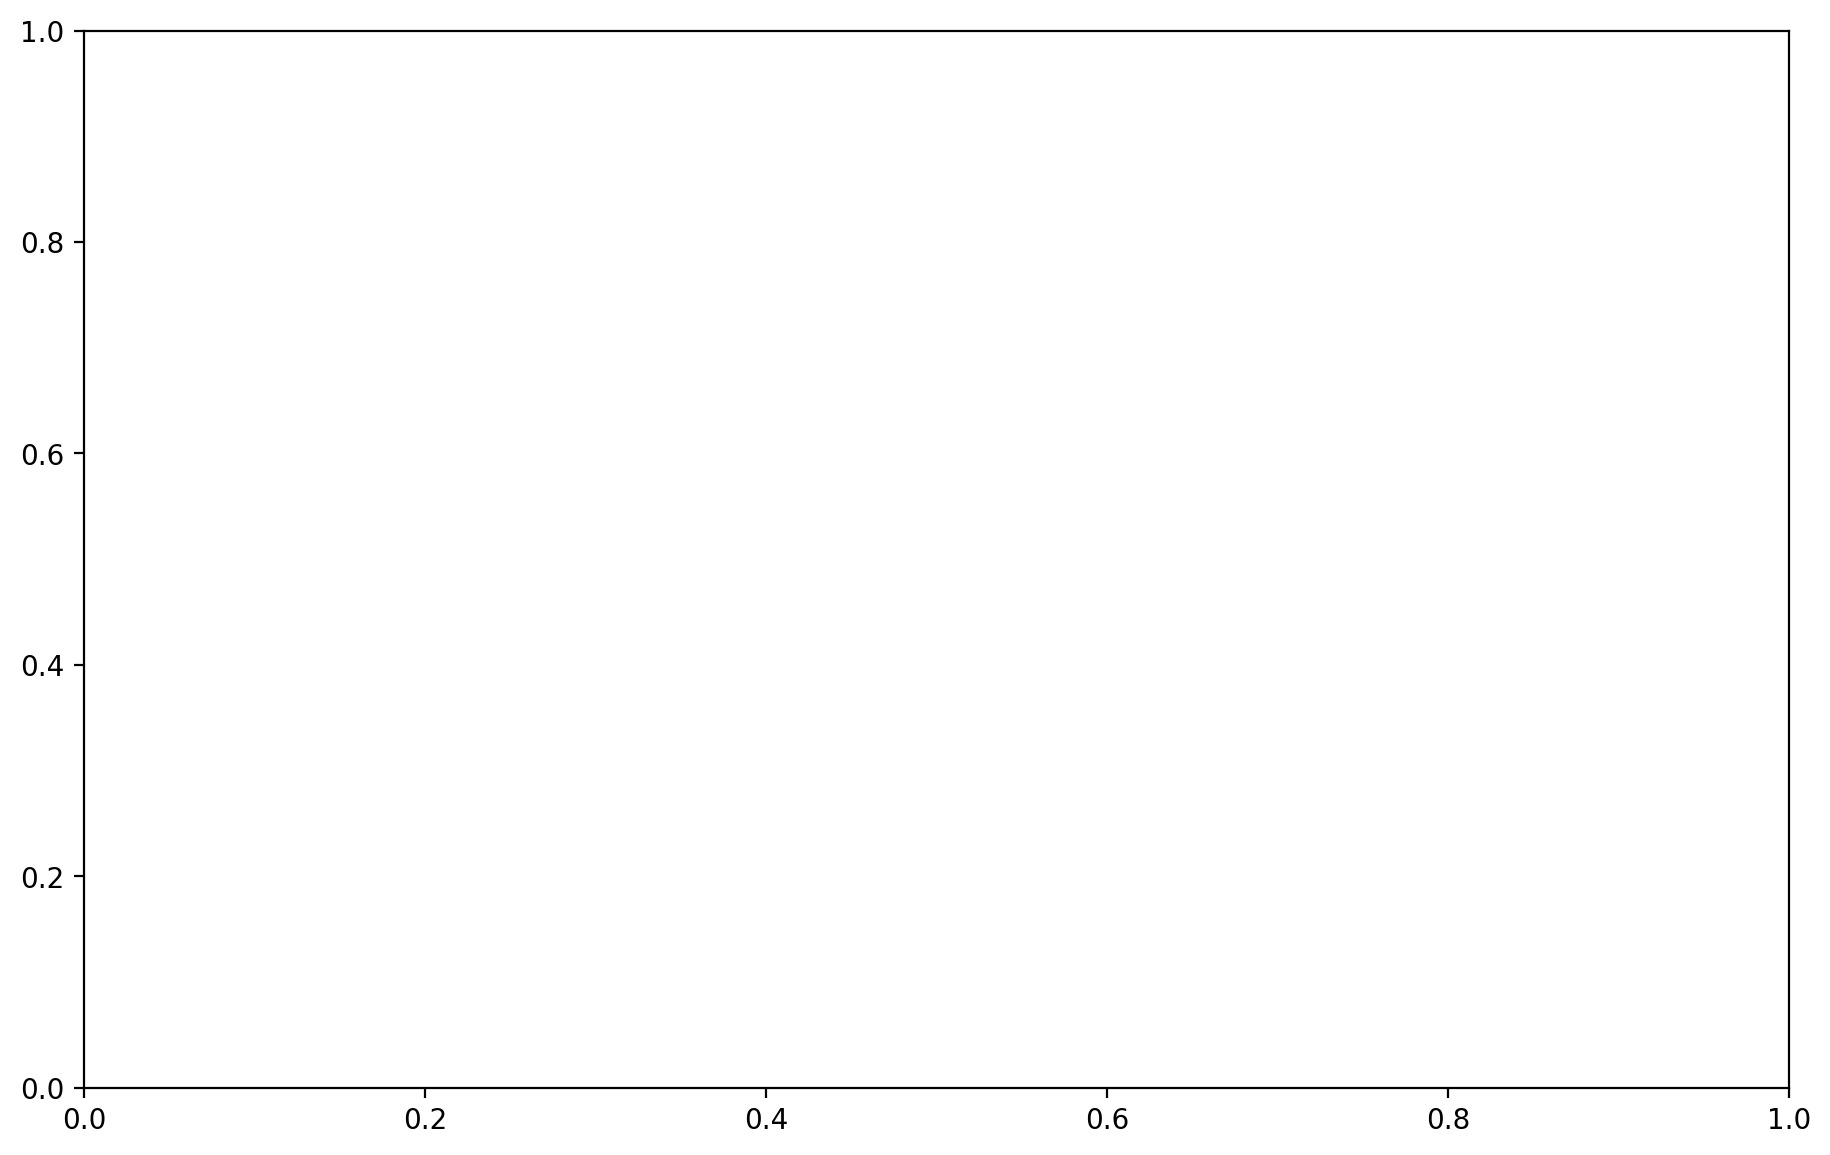

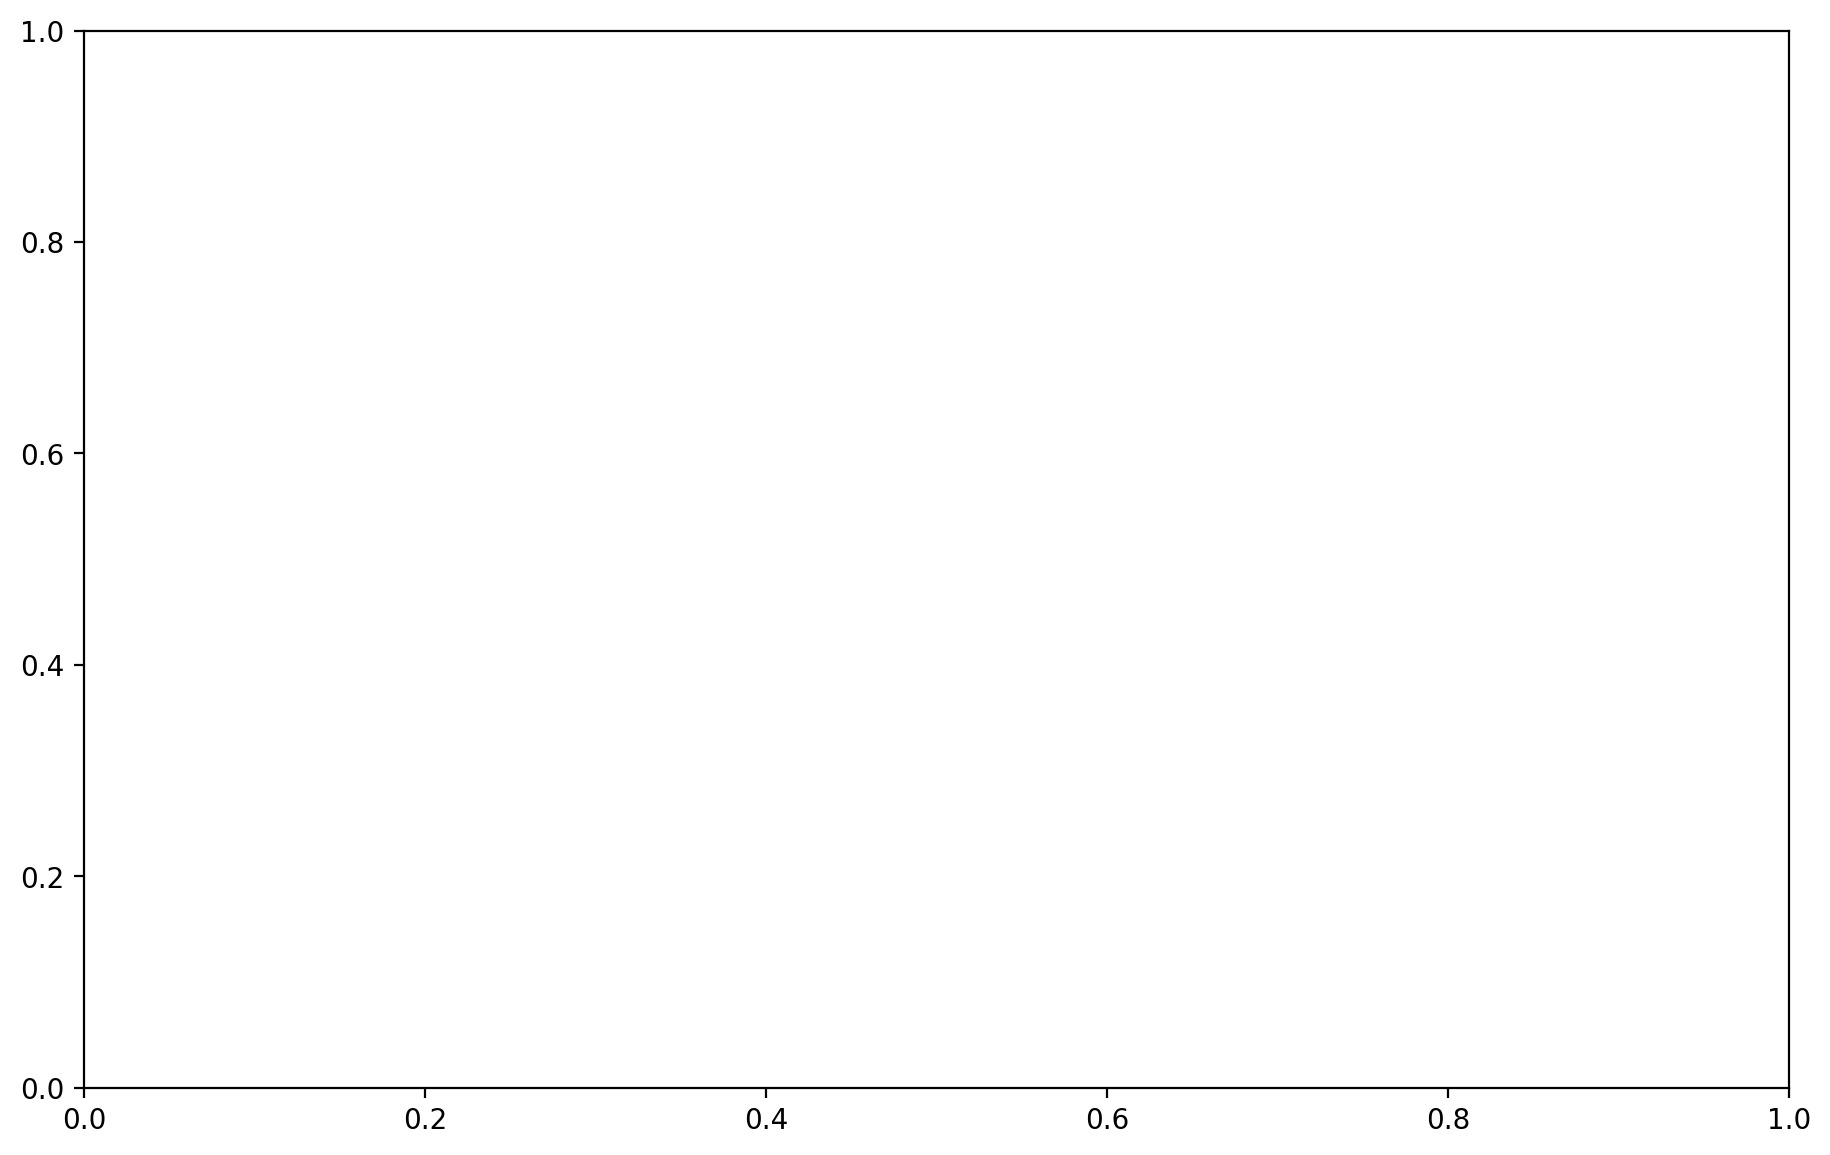

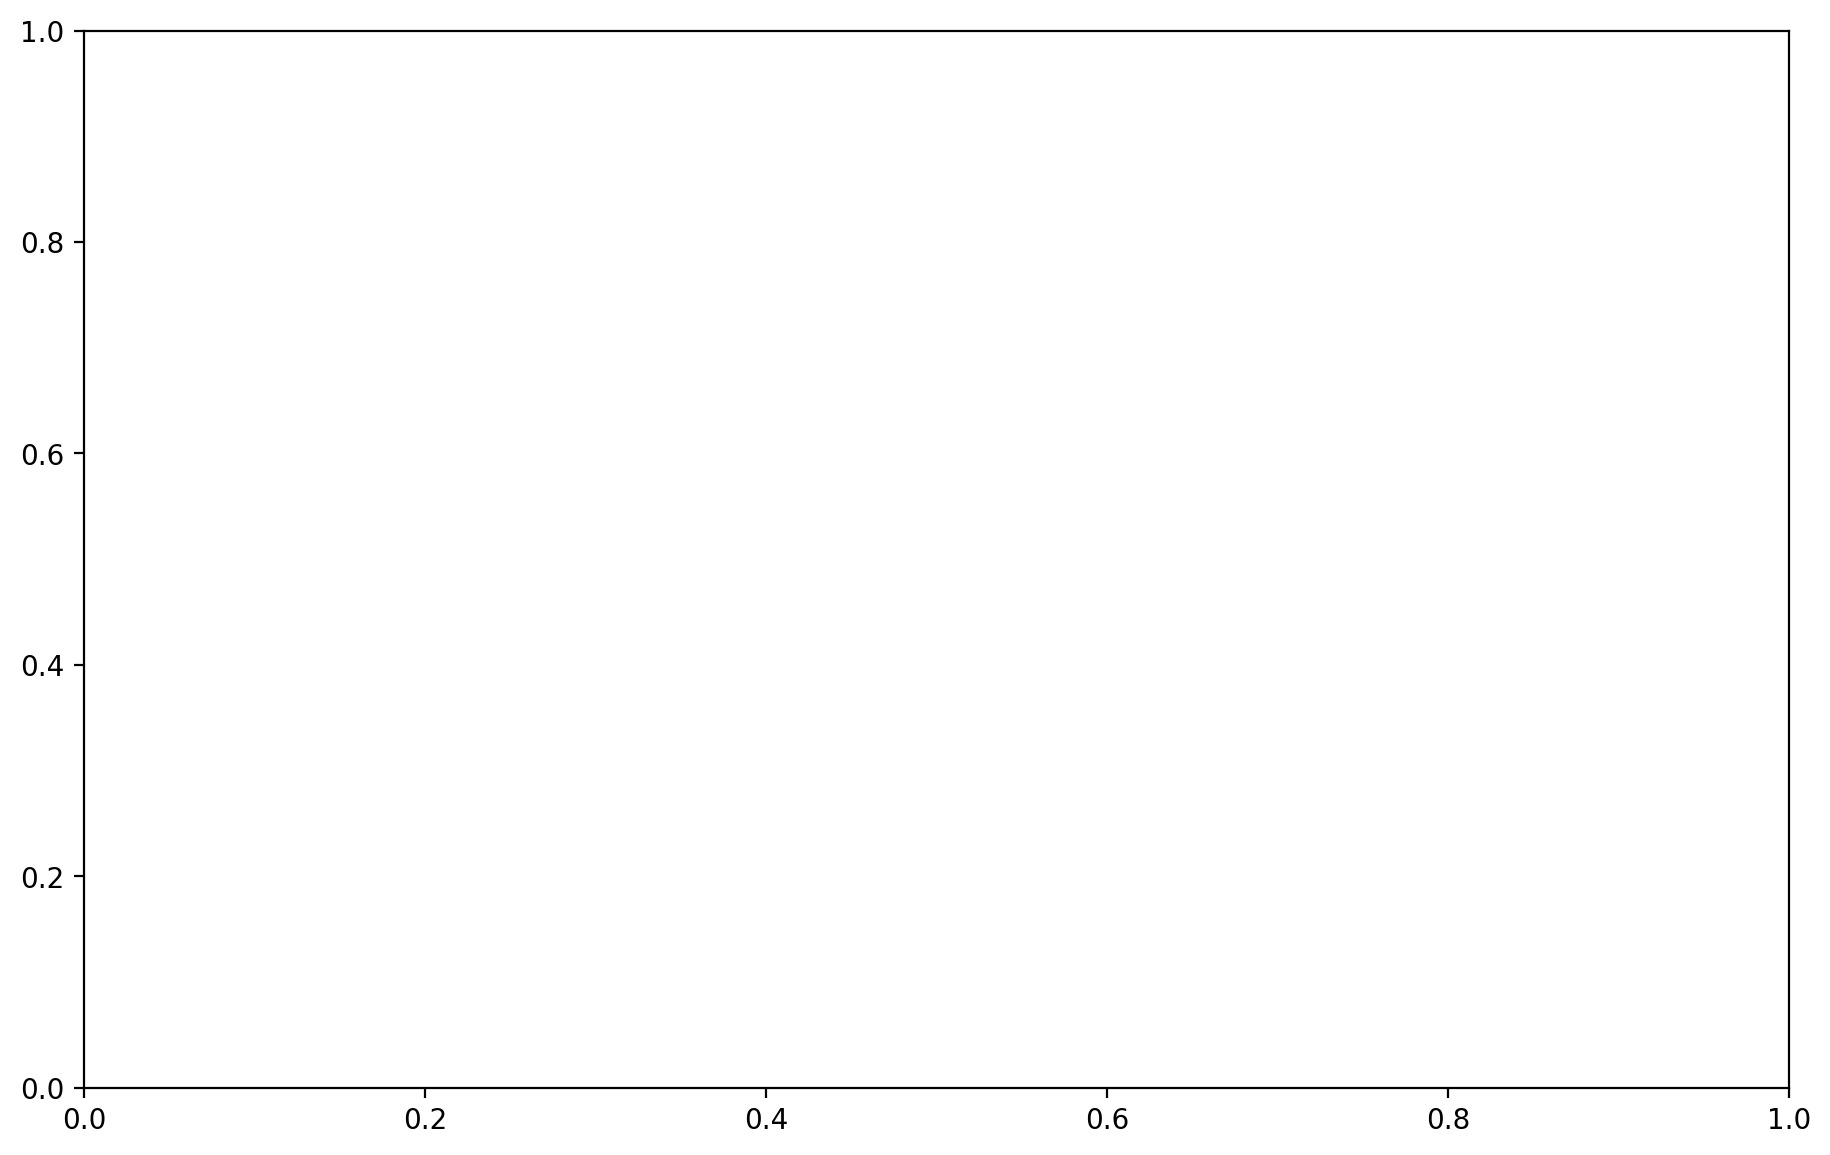

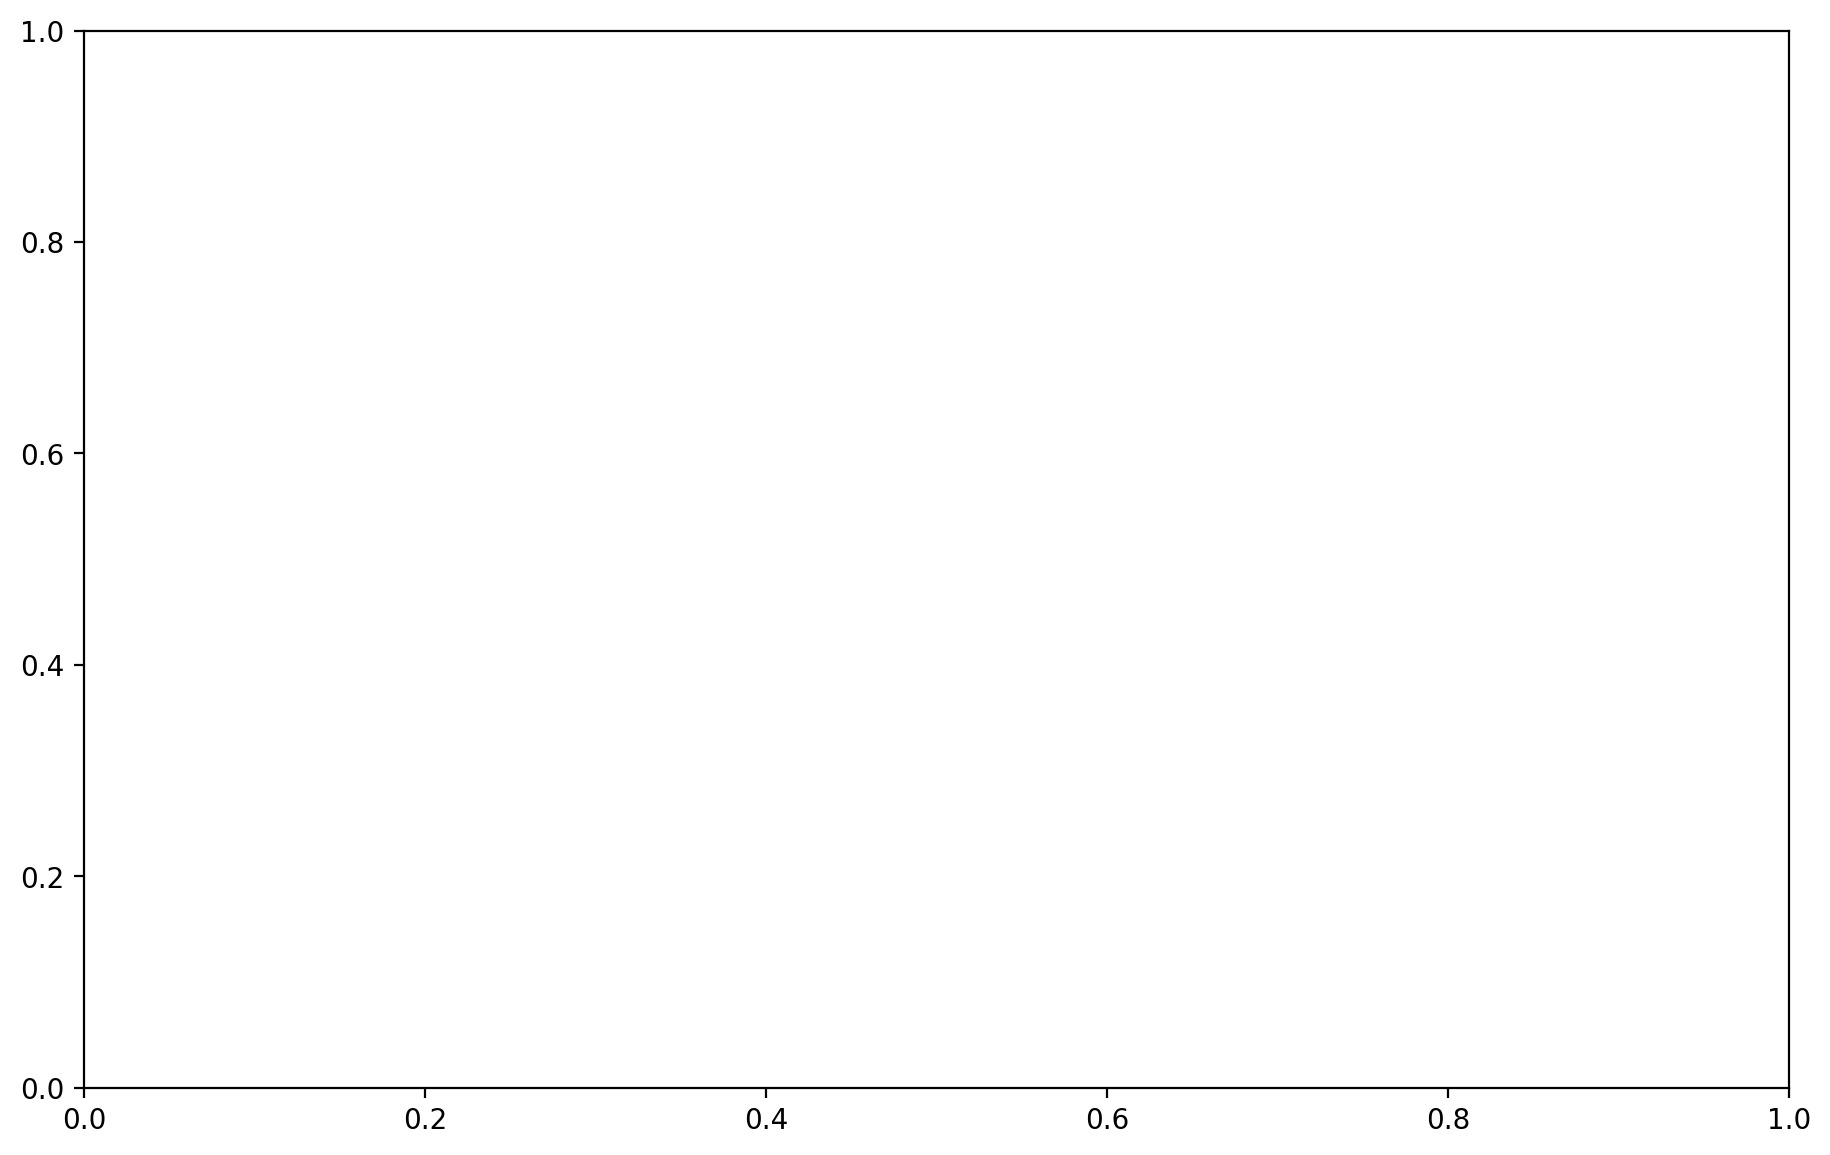

In [7]:
%run ../../../mscommfitting.py

biologfit = BIOLOGPhitting(fluxes_df, standardized_carbon_conc, None, biolog_df, experimental_metadata, '../../../../../../ModelSEED/ModelSEEDDatabase')
biologfit.fitAll(parameters={
        'v':.3,
        'cvmin': 0.1,
        'bcv': 0.0001,
        'diffpos': 100,
        'diffneg': 100,
    },
    rel_final_conc = 0.1,
    graphs=[
        {
            'trial':'G48',
            "phenotype": '*',
            'content': 'biomass',
            'experimental_data': False
        },
        {
            'trial':'G48',
            'content': "conc",
        },
        {
            'trial':'G48',
            "phenotype": '*',
            "species":["ecoli"],
            'content': 'biomass'
        },
        {
            'trial':'G48',
            'content': 'total_biomass',
            'experimental_data': True
        }
    ])

In [8]:
# biologfit.compute(graphs = [
#     {
#         'trial':'A3',
#         'content': 'all_biomass',
#         'experimental_data': True
#     }
# ], publishing=False)

In [9]:
# commfit.compute(graphs = [
#     {
#         'trial':'A3',
#         "phenotype": '*',
#         'content': 'biomass',
#         'experimental_data': False
#     }
# ], publishing=False)

# Testing BIOLOGPhitting

In [2]:
from modelseedpy.biochem import from_local
msdb = from_local('../../../../../../ModelSEED/ModelSEEDDatabase')

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_annotation', '_bound', '_id', '_model', '_reaction', '_repr_html_', '_set_id_with_model', 'abbr', 'annotation', 'charge', 'compartment', 'constraint', 'copy', 'delta_g', 'delta_g_error', 'elements', 'flags', 'formula', 'formula_weight', 'id', 'inchi', 'inchi_key', 'is_abstract', 'is_cofactor', 'is_core', 'is_obsolete', 'linked_compound', 'mass', 'model', 'name', 'names', 'notes', 'pka', 'pkb', 'reactions', 'remove_from_model', 'seed_id', 'shadow_price', 'smiles', 'source', 'summary', 'to_template_compartment_compound', 'y']


In [4]:
cpd = msdb.compounds.get_by_id("cpd00027")
print(cpd.elements)
print(dir(cpd))

{'C': 6, 'H': 12, 'O': 6}
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_annotation', '_bound', '_id', '_model', '_reaction', '_repr_html_', '_set_id_with_model', 'abbr', 'annotation', 'charge', 'compartment', 'constraint', 'copy', 'delta_g', 'delta_g_error', 'elements', 'flags', 'formula', 'formula_weight', 'id', 'inchi', 'inchi_key', 'is_abstract', 'is_cofactor', 'is_core', 'is_obsolete', 'linked_compound', 'mass', 'model', 'name', 'names', 'notes', 'pka', 'pkb', 'reactions', 'remove_from_model', 'seed_id', 'shadow_price', 'smiles', 'source', 'summary', 'to_template_compartment_compound', 'y']


In [1]:
from cobra.io import load_json_model
pf = load_json_model("../../../pf.json")

%run ../datastandardization.py
%run ../../../mscommfitting.py

# 
experimental_metadata, biolog_df, standardized_carbon_conc, trial_name_conversion, data_timestep_hr, simulation_timestep = BiologData.process(
    {"path": "../../Jeffs_data/BIOLOG/PF genIII plate 9-12-22.xlsx", "Fluorescence":"pf", "Raw OD(600)": "OD"}, 
    "../../Jeffs_data/BIOLOG/BIOLOG_trial_conditions.json")

biologfit = BIOLOGPhitting(standardized_carbon_conc, None, biolog_df, experimental_metadata, '../../../../../../ModelSEED/ModelSEEDDatabase')
biologfit.fitAll(models_list={"pf":pf},
    parameters={
        'v':.3,
        'cvmin': 0.1,
        'bcv': 0.0001,
        'diffpos': 100,
        'diffneg': 100,
    },
    rel_final_conc = 0.1,
    graphs=[
        {
            "phenotype": '*',
            'content': 'biomass',
            'experimental_data': False
        },
        {
            'content': "conc",
        },
        {
            "phenotype": '*',
            "species":["ecoli"],
            'content': 'biomass'
        },
        {
            'content': 'total_biomass',
            'experimental_data': True
        }
    ])

B1


condition       Negative Control
ModelSEED_ID                None
strain                        pf
date                  Sep 12, 22
Name: B1, dtype: object

B2


condition          Dextrin
ModelSEED_ID      cpd11594
strain                  pf
date            Sep 12, 22
Name: B2, dtype: object

B3


condition        D-Maltose
ModelSEED_ID      cpd00179
strain                  pf
date            Sep 12, 22
Name: B3, dtype: object

cpd00179 C12H22O11
passed
D=Maltose {'consumed': ['cpd00179']}
Done with concentrations and biomass loops: 0.0005208333333333333 min
Done with DCC loop: 0.0 min
Done with the DBC & diffc loop: 0.00234375 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.06067708333333333 min
Done exporting the content: 0.010677083333333334 min
The simulation lacks any flux.




B4


condition       D-Trehalose
ModelSEED_ID       cpd00523
strain                   pf
date             Sep 12, 22
Name: B4, dtype: object

cpd00523 C12H21O14P
passed
D=Trehalose {'consumed': ['cpd00523']}


KeyError: 'EX_cpd00523_e0'

In [ ]:
display(experimental_metadata, biolog_df)